Журавлев Никоалй Вадимович ИУ5-24М

Получение датасета

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(0)
df = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C'], size=100),
    'Value': np.random.normal(size=100)
})

Задача №5.
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".

One-Hot Encoding используется для представления категориальных переменных в виде числовых значений в моделях машинного обучения.
При использовании однозначного кодирования каждая категория в наборе данных представляется как бинарный вектор, где каждый элемент вектора соответствует уникальной категории.
Если точка данных относится к определенной категории, то элемент, соответствующий этой категории, устанавливается в 1, а все остальные элементы устанавливаются в 0.

In [ ]:
def one_hot_encoding(data):
    unique_values = np.unique(data)

    count_value = len(unique_values)
    result = np.zeros((len(data), count_value))

    for i, sequence in enumerate(data):
        for j, value in enumerate(unique_values):
            if sequence == value:
                result[i][j] = 1
    return result, unique_values.tolist()


array, name = one_hot_encoding(df['Category'].to_numpy())
print(name)
print(array)

Задача №25.
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе межквартильного размаха.

Для определения выбросов по методу IQR необходимо

1.   Вычислить Q1 (первый квартиль), Q3 (третий квартиль) и межквартильный размах (IQR).
2.   Выбросы определяются как значения, которые находятся за пределами диапазона Q1-1.5IQR до Q3+1.5IQR.

In [ ]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    result = data[(data.gt(lower_bound)) & (data.lt(upper_bound))].dropna()
    return result


# Добавление выброса
df.loc[len(df.index)] = ['A', -10]

data_without_outliers = IQR(df['Value'])
data_without_outliers

Для студентов группы ИУ5-24М, ИУ5И-24М - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

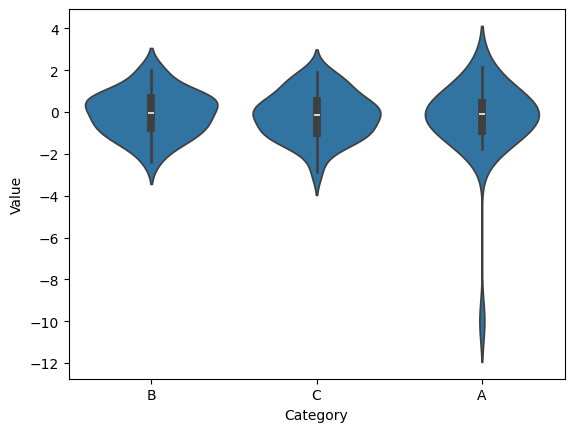

In [ ]:
sns.violinplot(x='Category', y='Value', data=df)
plt.show()